In [13]:
import numpy as np 
from text_writer import *
import re
from PIL import Image
from collections import Counter
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
#Choose type of data
types = ['10-K', 'DEF 14A']
#Choose Companies
tickers = ['NFLX', 'NKE', 'MSFT', 'KO']

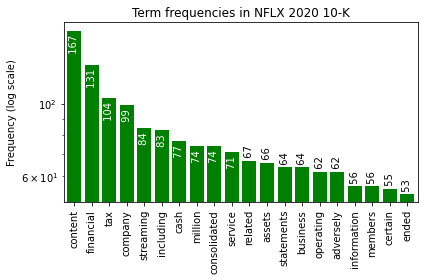

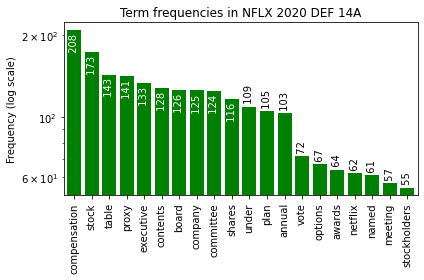

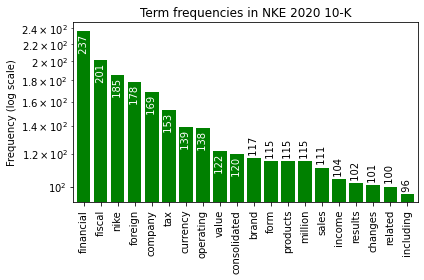

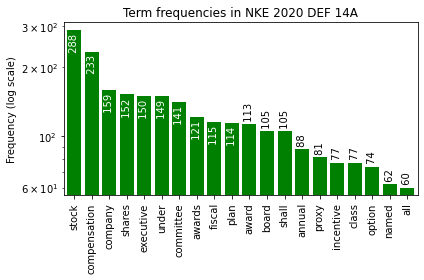

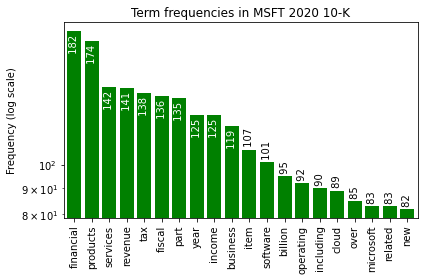

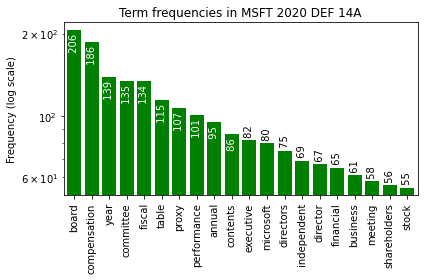

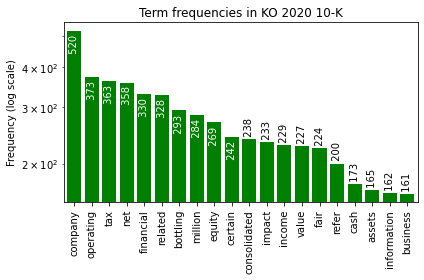

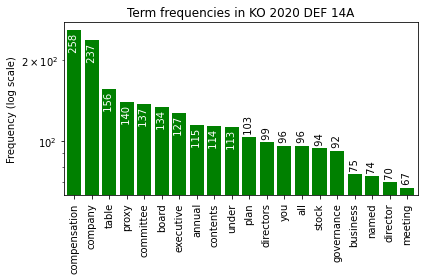

In [37]:
#Tokenize data

#Get current path
pa = os.getcwd().replace("\\","/")

#Get list of stop words to exclude
stopwords = open(pa + '/nonosquare_expl.txt',encoding ='utf-8')
stopwords_lines = stopwords.readlines()[0]
sw = stopwords_lines.split(' ')

#create word frequency plots

save = True #if the plots need to be saved

for tick in tickers:
    for typ in types:
        pa = os.getcwd().replace("\\","/")+'/Top 40' # path for for the .py folder

        pathf = os.getcwd().replace("\\","/")+"/Top 40/statements" # path for the .txt files
        
        #to print all the years:
        #_ , listyear = find_good(pa) # list of years for a specific company and type
        #listyear = listyear[tick + "_" + typ] # we want only the list where the current typ and ticker is concerned
        
        #to print only specific years
        listyear = [20]

        file_names = []

        for year in listyear:
            y = str(year)
            if len(y) < 2:
                y = str(0) + y
            file_names.append(typ + "_" + tick + "_" + y)

        for filen in file_names: # looping through all file names
            
            text = open(pathf + "/"+filen+".txt",encoding= 'utf-8') # opening file
            tokenized = tokenize(text,sw) # tokenising
            #create dictionary and count words
            count = Counter(tokenized)
            #plot most common words per document
            y = [count for tag, count in count.most_common(20)]
            x = [tag for tag, count in count.most_common(20)]
            plt.bar(x, y, color='green')
            plt.title("Term frequencies in "+tick.upper()+" "+'20'+str(year)+" "+typ)
            plt.ylabel("Frequency (log scale)")
            plt.yscale('log') # optionally set a log scale for the y-axis
            plt.xticks(rotation=90)
            for i, (tag, count) in enumerate(count.most_common(20)):
                plt.text(i, count, f' {count} ', rotation=90,
                        ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
            plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
            plt.tight_layout() # change the whitespace such that all labels fit nicely
            if save:
                plt.savefig('term_freq_'+tick.upper()+'_'+str(year)+'_'+typ)
            plt.show()
            

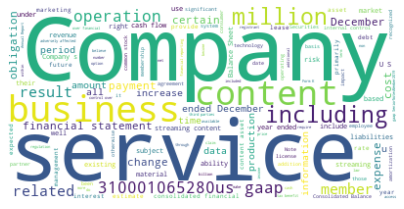

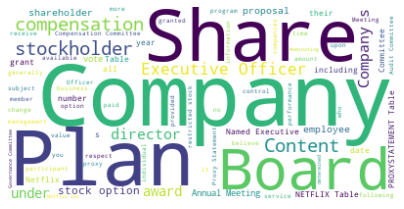

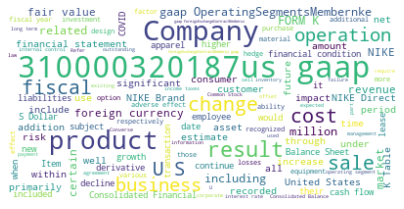

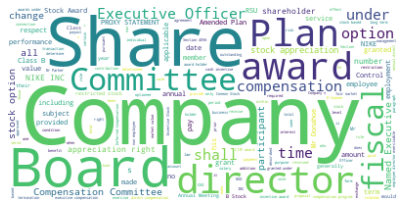

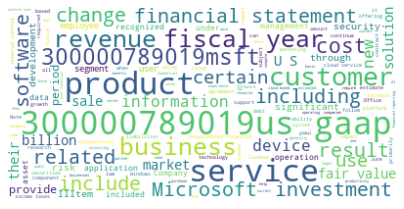

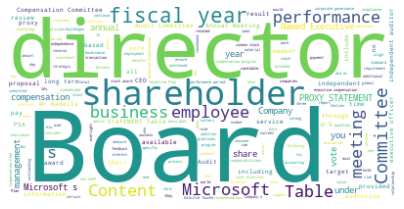

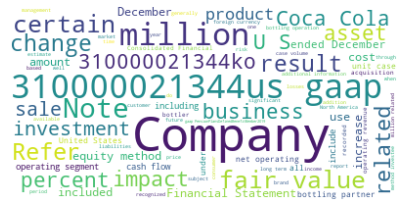

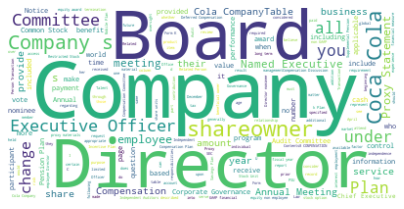

In [36]:
#Print Word Clouds

for tick in tickers:
    for typ in types:
        pa = os.getcwd().replace("\\","/")+'/Top 40' # path for for the .py folder

        pathf = os.getcwd().replace("\\","/")+"/Top 40/statements" # path for the .txt files
        
        #to print all the years:
        #_ , listyear = find_good(pa) # list of years for a specific company and type
        #listyear = listyear[tick + "_" + typ] # we want only the list where the current typ and ticker is concerned
        
        #to print only specific years
        listyear = [20]

        file_names = []

        for year in listyear:
            y = str(year)
            if len(y) < 2:
                y = str(0) + y
            file_names.append(typ + "_" + tick + "_" + y)

        yearly_scores = {}
        for filen in file_names: # looping through all file names         
            text = open(pathf + "/"+filen+".txt",encoding= 'utf-8') # opening file
            
            #Print Word cloud
            long_string = text.read().replace('\n', '')
            wordcloud = WordCloud(stopwords=sw, background_color="white", mode="RGBA", max_words=1000).generate(long_string)
            plt.figure(figsize=[7,7])
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")
            plt.show()